# Frey Face 

In [31]:
from scipy.io import loadmat
import numpy as np
from sklearn.model_selection import train_test_split
import h5py as h5

path = 'org_datasets/frey_rawface.mat'

raw = loadmat(path)
print(raw.keys())

img = np.array(raw['ff']).T.reshape((-1, 28* 20))

print(img.shape)

n_samples = img.shape[0]

X_train, X_test = train_test_split(img, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

with h5.File(f'datasets/truth/freyFace_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)

# import matplotlib.pyplot as plt
# plt.imshow(img.reshape(-1, 28, 20)[1000, :], cmap='gray')
# plt.show()


dict_keys(['__header__', '__version__', '__globals__', 'ff'])
(1965, 560)
(1375, 560) (590, 560)
<HDF5 file "freyFace_1965.h5" (mode r+)>


# Isomap Face

In [1]:
from scipy.io import loadmat
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import h5py as h5

org_data = loadmat(f'org_datasets/face_data/face_data.mat')
images = np.transpose(org_data['images'])
poses = np.transpose(org_data['poses'])
lights = np.transpose(org_data['lights'])

# import matplotlib.pyplot as plt
# plt.imshow(images.reshape(-1, 64, 64)[0, :].T, cmap='gray')
# plt.show()

X = images

print(X.shape)

reducer = PCA(n_components=512, random_state=35)
X = reducer.fit_transform(X)

print(X.shape)
n_samples = X.shape[0]
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

with h5.File(f'datasets/truth/isomapFace_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)


(698, 4096)
(698, 512)
(488, 512) (210, 512)


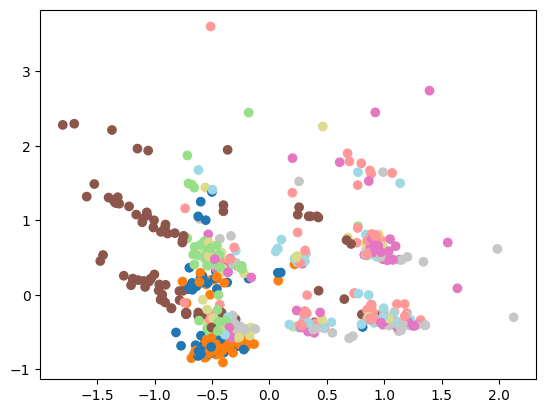

In [15]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import h5py as h5

with h5.File(f'org_datasets/cnae9/cnae9_1080.h5', 'r') as f:
    X = np.array(f['x'])
    y = np.array(f['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

pumap = PCA(n_components=2, random_state=35)
proj = pumap.fit_transform(X_train)

n_samples = X.shape[0]

import matplotlib.pyplot as plt
plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap='tab20')
plt.show()

with h5.File(f'datasets/truth/cnae9_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)



In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import h5py as h5
import glob
from tqdm import tqdm

pos_files = glob.glob("org_datasets/aclImdb/train/pos/*.txt")
pos_comments = []
neg_files = glob.glob("org_datasets/aclImdb/train/neg/*.txt")
neg_comments = []
for pf in tqdm(pos_files, desc="Reading Positive", ncols=100, unit="txt"):
    with open(pf, 'r', encoding='utf-8') as f:
        pos_comments.append(' '.join(f.readlines()))
for nf in tqdm(neg_files, desc="Reading Negative", ncols=100, unit="txt"):
    with open(nf, 'r', encoding='utf-8') as f:
        neg_comments.append(' '.join(f.readlines()))
comments = pos_comments + neg_comments
y = np.zeros((len(comments),)).astype('uint8')
y[:len(pos_comments)] = 1
tfidf = TfidfVectorizer(strip_accents='ascii',
                        stop_words='english', max_features=700)
X = tfidf.fit_transform(comments).todense()

X, _, y, _ = train_test_split(X, y, train_size=0.2, random_state=100, stratify=y)

n_samples = X.shape[0]


Reading Negative: 100%|█████████████████████████████████████| 12500/12500 [01:23<00:00, 149.47txt/s]


[[0.         0.         0.         ... 0.         0.11299976 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.11121965 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


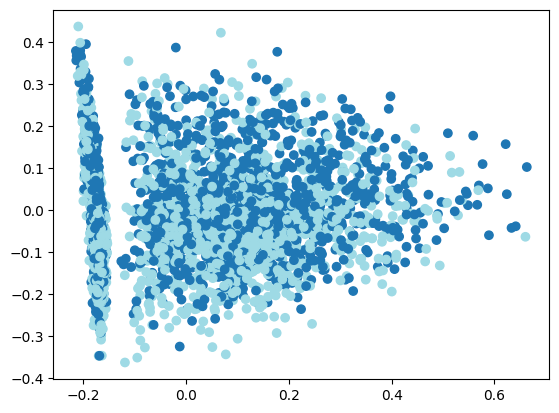

In [2]:
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=40, stratify=y)

print(X_train)

pumap = PCA(n_components=2, random_state=35)
proj = pumap.fit_transform(X_train)
import matplotlib.pyplot as plt
plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap='tab20')
plt.show()

with h5.File(f'datasets/truth/imdb_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)


(60000, 28, 28) (60000,)
(4200, 784) (4200,)


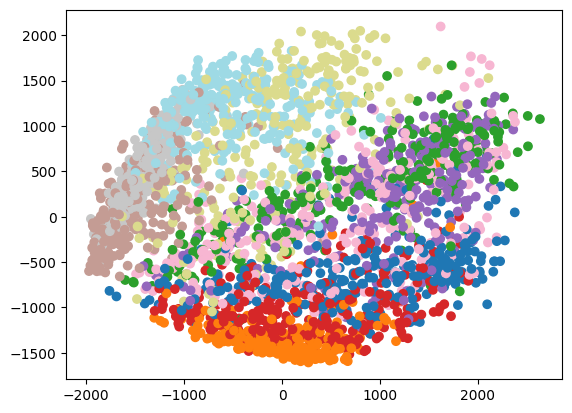

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import h5py as h5
import glob
from tqdm import tqdm
from torchvision.datasets import FashionMNIST
import torch

fmnist = FashionMNIST(root='org_datasets/fashionmnist', train=True, download=True, transform=None)

X = np.array(fmnist.data)
y = np.array(fmnist.targets).astype('int32')

print(X.shape, y.shape)
X, _, y, _ = train_test_split(X, y, train_size=0.07, random_state=1, stratify=y)
X = X.reshape((-1, 28 * 28))
y = y.squeeze()

n_samples = X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=40, stratify=y)

pumap = PCA(n_components=2, random_state=35)
proj = pumap.fit_transform(X_train)
import matplotlib.pyplot as plt
plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap='tab20')
plt.show()

with h5.File(f'datasets/truth/fashionMNIST_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)


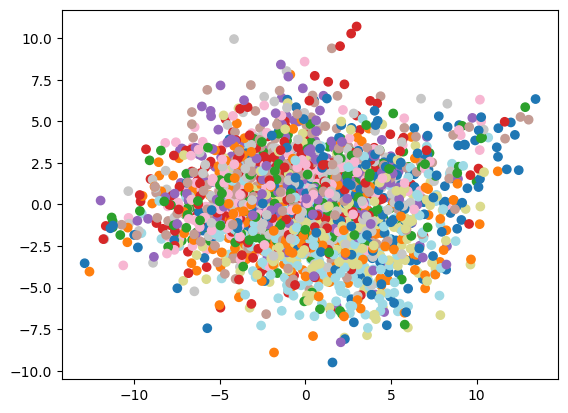

In [19]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import h5py as h5

with h5.File(f'org_datasets/cifar10/cifar10_3250.h5', 'r') as f:
    X = np.array(f['x'])
    y = np.array(f['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

pumap = PCA(n_components=2, random_state=35)
proj = pumap.fit_transform(X_train)

n_samples = X.shape[0]

import matplotlib.pyplot as plt
plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap='tab20')
plt.show()

with h5.File(f'datasets/truth/cifar10_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)



# dendritic

In [26]:
import scanpy as sc
import pandas as pd

expression_data = 'org_datasets/dendritic/dataset1_sm_uc3.txt'
adata = sc.read_text(expression_data, delimiter='\t', first_column_names=True, dtype='float64')
print(adata)  # 6954 x 1328
print(adata.obs_names[0:3])
print(adata.var_names[0:3])

adata = adata.transpose()
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
print(adata.obs_names[0:3])
print(adata.var_names[0:3])

AnnData object with n_obs × n_vars = 26593 × 576
Index(['1/2-SBSRNA4', '5S_RRNA', '5_8S_RRNA'], dtype='object')
Index(['pDC_P10_S73', 'pDC_P10_S74', 'pDC_P10_S75'], dtype='object')
Index(['pDC_P10_S73', 'pDC_P10_S74', 'pDC_P10_S75'], dtype='object')
Index(['1/2-SBSRNA4', '5S_RRNA', '5_8S_RRNA'], dtype='object')


In [31]:
# Read sample into a pandas series
cell_info = "org_datasets/dendritic/sample_sm_uc3.txt"
sample_adata = pd.read_csv(cell_info,header=0, index_col=0, sep='\t')
print(sample_adata.values.shape)
print(sample_adata.keys())
print(sample_adata.index)

(576, 3)
Index(['cell', 'celltype', 'batch'], dtype='object')
Index(['pDC_P10_S73', 'pDC_P10_S74', 'pDC_P10_S75', 'pDC_P10_S76',
       'pDC_P10_S77', 'pDC_P10_S78', 'pDC_P10_S79', 'pDC_P10_S80',
       'pDC_P10_S81', 'pDC_P10_S82',
       ...
       'CD1C_P4_S39', 'CD1C_P4_S40', 'CD1C_P4_S41', 'CD1C_P4_S42',
       'CD1C_P4_S43', 'CD1C_P4_S44', 'CD1C_P4_S45', 'CD1C_P4_S46',
       'CD1C_P4_S47', 'CD1C_P4_S48'],
      dtype='object', length=576)


In [33]:
adata.obs['batch'] = sample_adata.loc[adata.obs_names, "batch"]
print(len(adata.obs['batch']))
adata.obs['celltype'] = sample_adata.loc[adata.obs_names, "celltype"]
print(len(adata.obs['celltype']))

576
576


In [70]:
from sklearn.decomposition import  PCA
from umap import ParametricUMAP
import matplotlib.pyplot as plt
import h5py as h5

X = adata.X

X = PCA(n_components=50).fit_transform(X)

batch = adata.obs['batch'].factorize()[0]
y = adata.obs['celltype'].factorize()[0]

print(X.shape)

X_train = X[batch != 0]
y_train = y[batch != 0]
X_test = X[batch == 0]
y_test = y[batch == 0]

print(X_train.shape, X_test.shape)

n_samples = X.shape[0]
with h5.File(f'datasets/truth/dendritic_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)

# pumap = ParametricUMAP(n_components=2)
# proj_train = pumap.fit_transform(X_train)
# proj_test = pumap.transform(X_test)

# plt.scatter(proj_train[:, 0], proj_train[:, 1], s=4, c='gray')
# plt.scatter(proj_test[:, 0], proj_test[:, 1], s=4, c=y_test, alpha=0.5)


(576, 50)
(288, 50) (288, 50)


# Pancreas

In [54]:
import scanpy as sc
import pandas as pd

expression_data = 'org_datasets/pancreas/myData_pancreatic_5batches.txt'
adata = sc.read_text(expression_data, delimiter='\t', first_column_names=True, dtype='float64')

adata = adata.transpose()
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
print(adata.obs_names) # 基因
print(adata.var_names) # 细胞

Index(['human1_lib1.final_cell_0001', 'human1_lib1.final_cell_0002',
       'human1_lib1.final_cell_0003', 'human1_lib1.final_cell_0004',
       'human1_lib1.final_cell_0005', 'human1_lib1.final_cell_0006',
       'human1_lib1.final_cell_0007', 'human1_lib1.final_cell_0008',
       'human1_lib1.final_cell_0009', 'human1_lib1.final_cell_0010',
       ...
       'Sample_1589', 'Sample_1590', 'Sample_1591', 'Sample_1592',
       'Sample_1593', 'Sample_1594', 'Sample_1595', 'Sample_1597',
       'Sample_1598', 'Sample_1600'],
      dtype='object', length=14767)
Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A4GALT', 'A4GNT', 'AAAS', 'AACS',
       'AACSP1', 'AADAC',
       ...
       'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=15558)


In [55]:
cell_info = "org_datasets/pancreas/mySample_pancreatic_5batches.txt"
sample_adata = pd.read_csv(cell_info,header=0, index_col=0, sep='\t')
print(sample_adata.values.shape)
print(sample_adata.keys())
print(sample_adata.index)

(14767, 5)
Index(['batch', 'batchlb', 'celltype_orig', 'cellname', 'celltype'], dtype='object')
Index(['human1_lib1.final_cell_0001', 'human1_lib1.final_cell_0002',
       'human1_lib1.final_cell_0003', 'human1_lib1.final_cell_0004',
       'human1_lib1.final_cell_0005', 'human1_lib1.final_cell_0006',
       'human1_lib1.final_cell_0007', 'human1_lib1.final_cell_0008',
       'human1_lib1.final_cell_0009', 'human1_lib1.final_cell_0010',
       ...
       'Sample_1589', 'Sample_1590', 'Sample_1591', 'Sample_1592',
       'Sample_1593', 'Sample_1594', 'Sample_1595', 'Sample_1597',
       'Sample_1598', 'Sample_1600'],
      dtype='object', length=14767)


In [57]:
adata.obs['batch'] = sample_adata.loc[adata.obs_names, "batch"]
print(len(adata.obs['batch']))
adata.obs['celltype'] = sample_adata.loc[adata.obs_names, "celltype"]
print(len(adata.obs['celltype']))

14767
14767


In [59]:
from sklearn.decomposition import  PCA
from umap import ParametricUMAP
import matplotlib.pyplot as plt
import h5py as h5

batch, n_batch = adata.obs['batch'].factorize()
y = adata.obs['celltype'].factorize()[0]

print(y, batch)

X = adata.X
X = PCA(n_components=50).fit_transform(X)


[0 0 0 ... 7 7 7] [0 0 0 ... 4 4 4]


In [60]:

from sklearn.model_selection import train_test_split
X, _, y,_,batch,_ = train_test_split(X, y, batch, train_size=0.5, random_state=42, stratify=y)

X_train = X[batch < 2]
y_train = y[batch < 2]

X_test = X[batch >= 2]
y_test = y[batch >= 2]

print(X_train.shape, X_test.shape)


(5340, 50) (2043, 50)


c:\Users\60946\dev_env\lib\site-packages\umap\parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


Epoch 1/10
1742/1742 [==============================] - 9s 5ms/step - loss: 0.1749
Epoch 2/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1618
Epoch 3/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1604
Epoch 4/10
1742/1742 [==============================] - 8s 4ms/step - loss: 0.1596
Epoch 5/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1595
Epoch 6/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1592
Epoch 7/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1590
Epoch 8/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1588
Epoch 9/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1588
Epoch 10/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1585


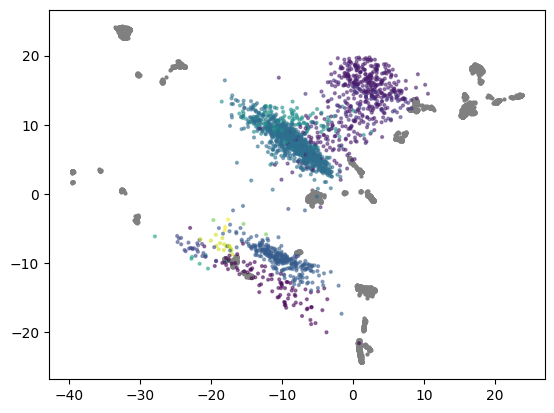

In [61]:


n_samples = X.shape[0]

with h5.File(f'datasets/truth/pancreas_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)

pumap = ParametricUMAP(n_components=2)
proj_train = pumap.fit_transform(X_train, )
proj_test = pumap.transform(X_test)

plt.scatter(proj_train[:, 0], proj_train[:, 1], s=4, c='gray')
plt.scatter(proj_test[:, 0], proj_test[:, 1], s=4, c=y_test, alpha=0.5)


# Retina

In [11]:
import scanpy as sc
import pandas as pd

b1path = 'org_datasets/retina/b1_exprs.txt'
adata1 = sc.read_text(b1path, delimiter='\t', first_column_names=True, dtype='float64')
print(adata1) 
adata1 = adata1.transpose()
sc.pp.normalize_per_cell(adata1)
sc.pp.log1p(adata1)
print(adata1.obs_names[0:3])
print(adata1.var_names[0:3])

AnnData object with n_obs × n_vars = 12333 × 26830
Index(['Bipolar1_CCCACAAGACTA', 'Bipolar1_CAAAGCATTTGC',
       'Bipolar1_CTTTTGATTGAC'],
      dtype='object')
Index(['0610007P14Rik', '0610009B22Rik', '0610009E02Rik'], dtype='object')


## Retina1 数据维度为12333

## Retina2 数据维度为12333

In [5]:

cell_info1 = "org_datasets/retina/b1_celltype.txt"
sample_adata1 = pd.read_csv(cell_info1,header=0, index_col=0, sep='\t')
print(sample_adata1.values.shape)
print(sample_adata1.keys())
print(sample_adata1.index)

print(adata1.obs_names)

(26830, 1)
Index(['CellType'], dtype='object')
Index(['Bipolar1_CCCACAAGACTA', 'Bipolar1_CAAAGCATTTGC',
       'Bipolar1_CTTTTGATTGAC', 'Bipolar1_GCTCCAATGACA',
       'Bipolar1_AAATACCCTCAT', 'Bipolar1_TGCATGCGTCCA',
       'Bipolar1_TTCCGGCTTTTC', 'Bipolar1_CAACGTATCCTT',
       'Bipolar1_CATCGAACGACG', 'Bipolar1_ACCGGAAGTCCA',
       ...
       'Bipolar6_GCAGGCCAGTGA', 'Bipolar6_GGACCCGTTAAA',
       'Bipolar6_GACCCGCTCATA', 'Bipolar6_GAGGATTGTCTT',
       'Bipolar6_GACGTGTTCGGA', 'Bipolar6_GGATCTTTCCAG',
       'Bipolar6_GACCCTATTCGT', 'Bipolar6_GGTCTCTGAGCC',
       'Bipolar6_GATGTGCTTATT', 'Bipolar6_GTAATCGGAACC'],
      dtype='object', name='CellId', length=26830)
Index(['Bipolar1_CCCACAAGACTA', 'Bipolar1_CAAAGCATTTGC',
       'Bipolar1_CTTTTGATTGAC', 'Bipolar1_GCTCCAATGACA',
       'Bipolar1_AAATACCCTCAT', 'Bipolar1_TGCATGCGTCCA',
       'Bipolar1_TTCCGGCTTTTC', 'Bipolar1_CAACGTATCCTT',
       'Bipolar1_CATCGAACGACG', 'Bipolar1_ACCGGAAGTCCA',
       ...
       'Bipolar6_GCAGGCC

In [9]:
adata1.obs['CellType'] = sample_adata1.loc[adata1.obs_names, "CellType"]
print(len(adata1.obs['CellType']))

26830


In [17]:

y = adata1.obs['CellType'].factorize()[0]

print(y.shape)

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X = adata1.X
X, _, y,_, = train_test_split(X, y, train_size=0.2, random_state=100, stratify=y)

X = PCA(n_components=50).fit_transform(X)

X_train = X
y_train = y

print(X_train.shape)

import h5py as h5
with h5.File('org_datasets/retina/retina1.h5', 'w') as f:
    f.create_dataset('X_train', data=X_train)
    f.create_dataset('y_train', data=y_train)

# X_test = X[batch >= 2]
# y_test = y[batch >= 2]

# print(X_train.shape, X_test.shape)

(26830,)
(5366, 50)


AttributeError: module 'h5py.h5' has no attribute 'File'

In [12]:
import scanpy as sc
import pandas as pd

b2path = 'org_datasets/retina/b2_exprs.txt'
adata2 = sc.read_text(b2path, delimiter='\t', first_column_names=True, dtype='float64')
print(adata2)
# adata2 = adata2.transpose()
# sc.pp.normalize_per_cell(adata2)
# sc.pp.log1p(adata2)
# print(adata2.obs_names[0:3])
# print(adata2.var_names[0:3])

# cell_info2 = "org_datasets/retina/b2_celltype.txt"
# sample_adata2 = pd.read_csv(cell_info2,header=0, index_col=0, sep='\t')
# print(sample_adata2.values.shape)
# print(sample_adata2.keys())
# print(sample_adata2.index)

# adata2.obs['CellType'] = sample_adata2.loc[adata2.obs_names, "CellType"]
# print(len(adata2.obs['CellType']))

AnnData object with n_obs × n_vars = 12333 × 44808


In [24]:

y = adata2.obs['CellType'].factorize()[0]

print(y.shape)

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X = adata2.X
X, _, y,_, = train_test_split(X, y, train_size=0.05, random_state=100, stratify=y)

X = PCA(n_components=50).fit_transform(X)

X_test = X
y_test = y

print(X_test.shape)

import h5py as h5
with h5.File('org_datasets/retina/retina2.h5', 'w') as f:
    f.create_dataset('X_test', data=X_test)
    f.create_dataset('y_test', data=y_test)


(44808,)
(2240, 50)


In [25]:
import h5py as h5
with h5.File('org_datasets/retina/retina1.h5', 'r') as f:
    train_X = np.array(f['X_train'])
    train_y = np.array(f['y_train'])

with h5.File('org_datasets/retina/retina2.h5', 'r') as f:
    test_X = np.array(f['X_test'])
    test_y = np.array(f['y_test'])

 
n_samples = train_X.shape[0] + test_X.shape[0]

with h5.File(f'datasets/truth/retina_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=train_X)
    gO.create_dataset('X0', data=test_X)
    gE.create_dataset('y0', data=train_y)
    gO.create_dataset('y0', data=test_y)


In [27]:
from umap import ParametricUMAP
pumap = ParametricUMAP(n_components=2)
proj_train = pumap.fit_transform(train_X)
proj_test = pumap.transform(test_X)

plt.scatter(proj_train[:, 0], proj_train[:, 1], s=4, c='gray')
plt.scatter(proj_test[:, 0], proj_test[:, 1], s=4, c=test_y, alpha=0.5)


c:\Users\60946\dev_env\lib\site-packages\umap\parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


Epoch 1/10
 323/1926 [====>.........................] - ETA: 3:28 - loss: 0.2454

KeyboardInterrupt: 

# 统计每个真实数据集的特征

In [10]:
from glob import glob
import os
import h5py as h5
import numpy as np

print(f"Dataset\tname\tn_sam\tn_dims")
for filename in glob('datasets/truth/*.h5'):
    with h5.File(filename, 'r') as f:
        gE = f['E']
        gO = f['O']
        X_train = np.array(gE['X0'])
        X_test = np.array(gO['X0'])
        n_samples = X_train.shape[0] + X_test.shape[0]
        n_dims = X_train.shape[1]
        print(f"Dataset\t{os.path.basename(filename)[:5]}\t{n_samples}\t{n_dims}")


Dataset	name	n_sam	n_dims
Dataset	cifar	3250	1024
Dataset	cnae9	1080	856
Dataset	dendr	576	50
Dataset	fashi	4200	784
Dataset	freyF	1965	560
Dataset	imdb_	5000	700
Dataset	isoma	698	512
Dataset	pancr	7383	50
Dataset	retin	7606	50


In [3]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import h5py as h5
import glob
from tqdm import tqdm

pos_files = glob.glob("org_datasets/aclImdb/train/pos/*.txt")
pos_comments = []
neg_files = glob.glob("org_datasets/aclImdb/train/neg/*.txt")
neg_comments = []
for pf in tqdm(pos_files, desc="Reading Positive", ncols=100, unit="txt"):
    with open(pf, 'r', encoding='utf-8') as f:
        pos_comments.append(' '.join(f.readlines()))
for nf in tqdm(neg_files, desc="Reading Negative", ncols=100, unit="txt"):
    with open(nf, 'r', encoding='utf-8') as f:
        neg_comments.append(' '.join(f.readlines()))



Reading Negative: 100%|███████████████████████████████████| 12500/12500 [00:01<00:00, 12033.45txt/s]


In [4]:
print(f"Positive: {len(pos_comments)}\tNegative: {len(neg_comments)}")

with h5.File('org_datasets/aclImdb/aclImdb_train.h5', 'w') as f:
    f.create_dataset('pos', data=pos_comments)
    f.create_dataset('neg', data=neg_comments)


Positive: 12500	Negative: 12500


In [3]:

pos_files = glob.glob("org_datasets/aclImdb/test/pos/*.txt")
pos_comments = []
neg_files = glob.glob("org_datasets/aclImdb/test/neg/*.txt")
neg_comments = []
for pf in tqdm(pos_files, desc="Reading Positive", ncols=100, unit="txt"):
    with open(pf, 'r', encoding='utf-8') as f:
        pos_comments.append(' '.join(f.readlines()))
for nf in tqdm(neg_files, desc="Reading Negative", ncols=100, unit="txt"):
    with open(nf, 'r', encoding='utf-8') as f:
        neg_comments.append(' '.join(f.readlines()))


Reading Negative: 100%|███████████████████████████████████████| 5985/5985 [00:32<00:00, 182.80txt/s]


In [4]:

with h5.File('org_datasets/aclImdb/aclImdb_test.h5', 'w') as f:
    f.create_dataset('pos', data=pos_comments)
    f.create_dataset('neg', data=neg_comments)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import h5py as h5
import matplotlib.pyplot as plt
from tqdm import tqdm

with h5.File('org_datasets/aclImdb/aclImdb_train.h5', 'r') as f:
    pos_comments = list(f['pos'])
    neg_comments = list(f['neg'])

comments = pos_comments + neg_comments
y_train = np.zeros((len(comments),)).astype('uint8')
y_train[:len(pos_comments)] = 1
tfidf = TfidfVectorizer(strip_accents='ascii',
                        stop_words='english', max_features=700)
X_train = tfidf.fit_transform(comments).todense()

with h5.File('org_datasets/aclImdb/aclImdb_test.h5', 'r') as f:
    pos_comments = list(f['pos'])
    neg_comments = list(f['neg'])

comments = pos_comments + neg_comments
y_test = np.zeros((len(comments),)).astype('uint8')
y_test[:len(pos_comments)] = 1
tfidf = TfidfVectorizer(strip_accents='ascii',
                        stop_words='english', max_features=700)
X_test = tfidf.fit_transform(comments).todense()



In [ ]:

from methods.methods import Methods

# method_name = 'ptsne22'
method_name = 'cdr'
methods = Methods(verbose=True)
method = methods.get(method_name)

method.fit(np.array(X_train))
proj_train = method.transform(np.array(X_train))
proj_test  = method.transform_oos(np.array(X_test))


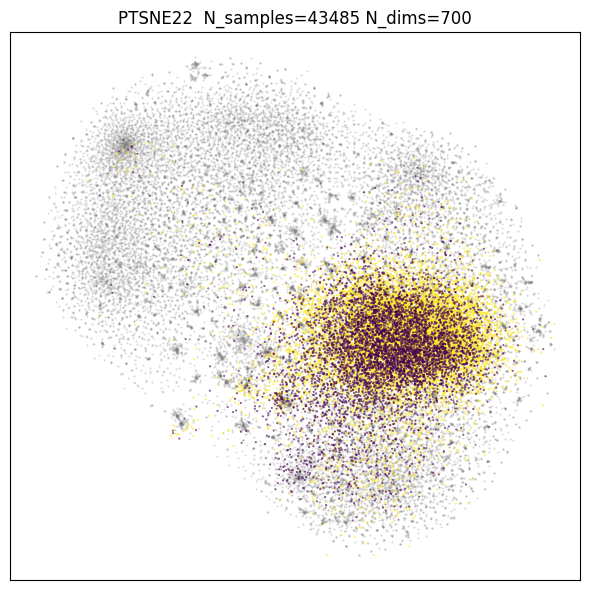

In [37]:
fig = plt.figure(figsize=(6, 6))
plot = fig.add_subplot(111)
plot.scatter(proj_train[:, 0], proj_train[:, 1], s=1, marker='.', c='gray', alpha=0.3)
plot.scatter(proj_test[:, 0], proj_test[:, 1], s=1, marker='.', c=y_test, alpha=0.7)
plot.set_xticks([])
plot.set_yticks([])
plot.set_title(f'{method_name} N_samples={proj_train.shape[0] + proj_test.shape[0]} N_dims={X_train.shape[1]}')
fig.tight_layout()
fig.savefig('imgs/imdb-all-ptsne22.png', dpi=500)



# RAiD Dataset

In [33]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

with h5.File('org_datasets/RAiD/RAiD_4Cams.mat', 'r') as f:
    cam = f['dataset']['cam'][:]
    images = f['dataset']['images'][:]
    images = np.transpose(images, axes=(0, 3, 2, 1))
    print(images.shape)
    images = np.reshape(images, (images.shape[0], -1))

    name = f['dataset']['name'][:].squeeze()
    personID = f['dataset']['personID'][:].squeeze()
    # keys: ['cam', 'count', 'images', 'masks', 'name', 'peopleCount', 'personID', 'personSubsetImageIndex']

cam1_idx = np.argwhere(cam == 1)[:,0]
cam2_idx = np.argwhere(cam == 2)[:,0]
cam3_idx = np.argwhere(cam == 3)[:,0]
cam4_idx = np.argwhere(cam == 4)[:,0]

cam124_idx = np.union1d(cam1_idx, np.union1d(cam2_idx, cam4_idx))

persons = np.unique(personID)
persons_id = np.random.choice(persons, 12, replace=False)
person_idx = np.argwhere(np.isin(personID, persons_id))

person_cam124_idx = np.intersect1d(person_idx, cam124_idx)
person_cam3_idx = np.intersect1d(person_idx, cam3_idx)

X_train = images[person_cam124_idx]
X_test  = images[person_cam3_idx]
y_train = personID[person_cam124_idx]
y_test  = personID[person_cam3_idx]


(6920, 128, 64, 3)


Using ResNetV2 to extract features

In [34]:
import cv2
from keras.applications import inception_resnet_v2

# height, width, channels
scale_shape = (128, 75, 3)

X = np.vstack((X_train, X_test))
img_scale= np.zeros((X.shape[0], scale_shape[0], scale_shape[1], scale_shape[2]))
for xi, x in enumerate(X):
    img = x.reshape(128, 64, 3)
    img = cv2.resize(img, dsize=(scale_shape[1], scale_shape[0]))
    img_scale[xi] = img

print('X shape:', img_scale.shape)

model = inception_resnet_v2.InceptionResNetV2(
    include_top=False, weights='imagenet', input_shape=scale_shape, pooling='max')

img_scale /= 255.0
img_feature = model.predict(img_scale)


X shape: (1955, 128, 75, 3)
62/62 [==============================] - 6s 40ms/step


In [35]:
X_train = img_feature[:X_train.shape[0]]
X_test  = img_feature[X_train.shape[0]:]

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

with h5.File(f'datasets/truth/raid_{X_train.shape[0]+X_test.shape[0]}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)


X_train shape: (1355, 1536)
X_test shape: (600, 1536)


In [36]:
from sklearn.decomposition import PCA
from umap.parametric_umap import ParametricUMAP

# X_train = PCA(n_components=50).fit_transform(X_train)
# X_test  = PCA(n_components=50).fit_transform(X_test)

pca = ParametricUMAP(n_components=2)
proj_train = pca.fit_transform(X_train)
proj_test = pca.transform(X_test)


Epoch 1/10
418/418 [==============================] - 6s 13ms/step - loss: 0.2076
Epoch 2/10
418/418 [==============================] - 5s 12ms/step - loss: 0.1932
Epoch 3/10
418/418 [==============================] - 6s 14ms/step - loss: 0.1919
Epoch 4/10
418/418 [==============================] - 6s 15ms/step - loss: 0.1914
Epoch 5/10
418/418 [==============================] - 5s 12ms/step - loss: 0.1914
Epoch 6/10
418/418 [==============================] - 5s 12ms/step - loss: 0.1911
Epoch 7/10
418/418 [==============================] - 5s 12ms/step - loss: 0.1908
Epoch 8/10
418/418 [==============================] - 5s 13ms/step - loss: 0.1906
Epoch 9/10
418/418 [==============================] - 5s 12ms/step - loss: 0.1907
Epoch 10/10
418/418 [==============================] - 5s 11ms/step - loss: 0.1904


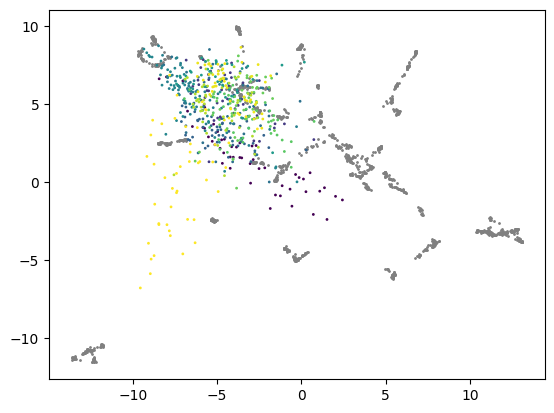

In [37]:

plt.scatter(proj_train[:,0], proj_train[:,1], c='gray', s=1)
plt.scatter(proj_test[:,0], proj_test[:,1], c=y_test, s=1)
plt.show()

## Gas Sensor Array Drift Dataset

In [79]:
import h5py as h5
import pandas as pd
import numpy as np

for i in range(1, 11):
    df = pd.read_csv(f'org_datasets/sensor/batch{i}.dat', sep=' ', header=None)
    df.loc[:][0]
    indices = df.loc[:][0]
    label=[]
    for idx in indices:
        label.append(int(idx.split(';')[0]))
    label=np.array(label)
    
    values = df.loc[:].values[:,1:-1]
    X=[]
    for value in values:
        x = []
        for v in value:
            x.append(float(v.split(':')[1]))
        X.append(np.array(x))
    X=np.array(X)
    print('batch:', i, 'n_label:', np.unique(label).shape[0], 'shape:', X.shape)
    with h5.File(f'org_datasets/sensor/batch{i}.h5', 'w') as f:
        f.create_dataset('X', data=X)
        f.create_dataset('y', data=label)


batch: 1 n_label: 6 shape: (445, 128)
batch: 2 n_label: 6 shape: (1244, 128)
batch: 3 n_label: 5 shape: (1586, 128)
batch: 4 n_label: 5 shape: (161, 128)
batch: 5 n_label: 5 shape: (197, 128)
batch: 6 n_label: 6 shape: (2300, 128)
batch: 7 n_label: 6 shape: (3613, 128)
batch: 8 n_label: 6 shape: (294, 128)
batch: 9 n_label: 6 shape: (470, 128)
batch: 10 n_label: 6 shape: (3600, 128)


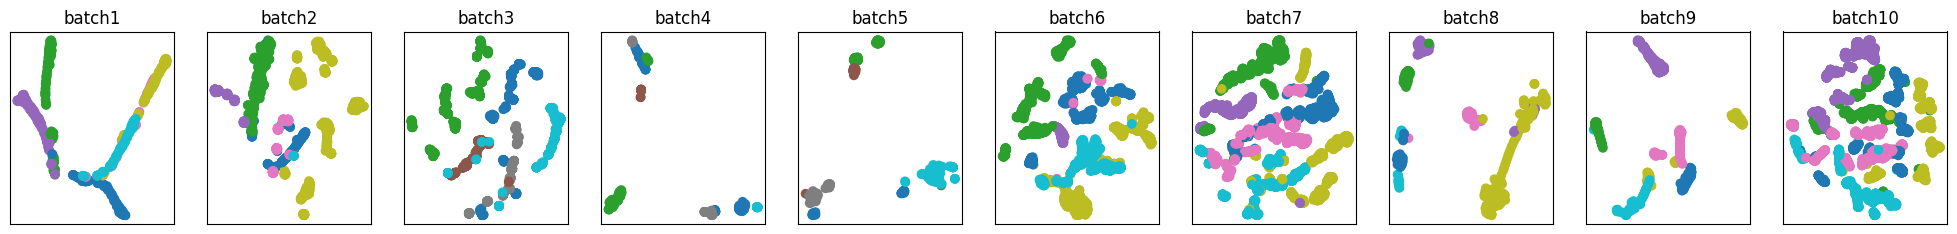

In [84]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10*2.5, 2.5))

for i in range(0, 10):
    with h5.File(f'org_datasets/sensor/batch{i+1}.h5', 'r') as f:
        X = f['X'][:]
        y = f['y'][:]
        dr = TSNE(n_components=2)
        proj = dr.fit_transform(X)
        ax[i].scatter(proj[:, 0], proj[:, 1], c=y, cmap='tab10')
        ax[i].set_title(f'batch{i+1}')
        ax[i].set_xticks([])
        ax[i].set_yticks([])

plt.show()

In [85]:

with h5.File(f'org_datasets/sensor/batch{7}.h5', 'r') as f:
    X_train = f['X'][:]
    y_train = f['y'][:]

with h5.File(f'org_datasets/sensor/batch{10}.h5', 'r') as f:
    X_test = f['X'][:]
    y_test = f['y'][:]



In [ ]:
from methods.methods import *
methods_name = ['pca', 'cdr', 'ptsne22', 'pumap']
methods = Methods(verbose=True)

projects=[]

for method in methods_name:
    print('method:', method)
    dr = methods.get(method)
    dr.fit(X_train)
    proj_train = dr.transform(X_train)
    proj_test = dr.transform_oos(X_test)
    projects.append((proj_train, proj_test))
